#  Statistical Analysis of Blood pressure in Diabetic and Non-diabetic Female

*STAT 201, GROUP 19: Tianyu Duan, Cheryl Hu, Manya Jain, Mayank Verma*

## A. Introduction

### A.1 Background Information

Diabetes is a chronic metabolic disease that affects millions of people worldwide, with a higher prevalence in women than men. Hypertension (or high blood pressure) is a common complication of diabetes and is associated with an increased risk of cardiovascular disease, kidney disease, and nerve damage. Women with diabetes face unique challenges, including an increased risk of pregnancy-related complications and a higher incidence of certain types of cancer. 

Therefore, understanding the relationship between diabetes and blood pressure in women is crucial for managing diabetes, reducing the risk of cardiovascular complications and to develop effective prevention and treatment strategies. 

In this project, we aim to conduct a statistical analysis of blood pressure in diabetic and non-diabetic females. 

![dataset-cover.jpg](https://storage.googleapis.com/kaggle-datasets-images/2619659/4476380/537d6f242a27ce3eace3718cbfd31595/dataset-cover.jpg?t=2022-11-09-12-29-13)


### A.2 Research Question
The question we will try to answer with this project is:
*"Is there a significant difference in blood pressure between diabetic and non-diabetic females? "*

This question sets up the possibility of conducting a hypothesis test to determine whether there is a statistically significant difference in blood pressure between the two groups.

We have framed our question based on previous studies that have shown that diabetic females have higher blood pressure levels than non-diabetic females. For example, Kazeminia et al. found that women with diabetes had a significantly higher prevalence of hypertension compared to those without diabetes (Kazeminia, M., Salari, N., & Mohammadi, M. (2020)). The study highlights the importance of monitoring and managing hypertension in women with diabetes to reduce cardiovascular disease risk.

Another study by Savoia and Touyz provides insights on the interplay between diabetes, hypertension, and cardiovascular disease, highlighting the importance of early and effective blood pressure management to reduce the risk of long-term complications (Savoia, C., & Touyz, R. M. (2017)). 


### A.3 Dataset Used
The dataset used is picked from Kaggle (https://www.kaggle.com/datasets/whenamancodes/predict-diabities?resource=download) and contains information on blood pressure, diabetes status, and other health-related variables of females. It is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Based on the diagnostic measurements included in the dataset, its objective is to predict whether a patient has diabetes. The dataset has been selected from a larger database using several constraints. Particularly, all patients in the dataset are females, 21 years of age or older, belonging to the Pima Indian heritage. 

The dataset uses independent variables, along with one pager dependent variable (Outcome).

Following are the dataset attributes:
1. Pregnancies: To express the Number of pregnancies
2. Glucose: To express the Glucose level in blood
3. BloodPressure: To express the Blood pressure measurement
4. SkinThickness: To express the thickness of the skin
5. Insulin: To express the Insulin level in blood
6. BMI: To express the Body mass index
7. DiabetesPedigreeFunction: To express the Diabetes percentage
8. Age: To express the age
9. Outcome: To express the final result 1 is Yes and 0 is No

We will drop any unnecessary variables and focus on the relevant variables for our analysis: Blood Pressure and Outcome.

Our response variable of interest is blood pressure. We will compare it across two categories: diabetic and non-diabetic females. We will consider the mean blood pressure as a location parameter and the standard deviation as a scale parameter. 

We chose the variable ‘blood pressure’ for our analysis as many past studies have found that the presence of diabetes is correlated with higher blood pressure (Petri et al., Roumie et al.). Also,  these parameters provide a comprehensive understanding of the blood pressure distribution in each group and enable us to compare the differences between the two groups.

### A.4 Hypothesis

We will answer our question using hypothesis testing, forming a null and an alternative hypothesis as follows:

- **Null hypothesis:** There is no significant difference in blood pressure between individuals with diabetes and healthy individuals.

- **Alternative hypothesis:** The blood pressure of females with diabetes is significantly higher than that of female individuals without diabetes.

## B. Preliminary results

Firstly, we load the required packages in R to gain access to useful functions for performing the data analysis.

In [108]:
# loading all the required libraries. 
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(dplyr)
options(repr.matrix.max.rows = 6)
set.seed(1)

Then, we load the dataset from the link "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv" in GITHUB by using the `read_csv` function.

In [129]:
# Purpose of the cell: loading the required dataset
diabetes_data <- read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv", show_col_types = FALSE)

# viewing the data
head(diabetes_data)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


Table 1

We now clean and wrangle the data into a tidy format and store the final cleaned data as `diabetes_data_final`.

In [117]:
# Goal of the cell: Clean and wrangle data into a tidy format
# filtering out BloodPressure = 0
diabetes_data_filtered <- diabetes_data %>%
filter(BloodPressure != 0)

# tidying the data further by modifying num column to show whether the patient has diabetes or not.
# naming the Outcome as No, for 0, which means diabetes is not present and as Yes for 1, which means that diabetes is present.
Outcome <- diabetes_data_filtered %>%
    select (Outcome) %>%
    mutate (Outcome = as.character (Outcome))
Outcome [Outcome == "0"] <- "No"
Outcome [Outcome == "1"] <- "Yes"
Outcome <- Outcome %>%
 mutate (Outcome = as_factor (Outcome))

# selecting the columns we want to use
diabetes_data_selected <- diabetes_data_filtered %>%
    select(BloodPressure)

# merging the data
diabetes_data_final <- cbind(diabetes_data_selected, Outcome) %>%
    rename ("diabetes" = "Outcome") 

head(diabetes_data_final) 

,BloodPressure,diabetes
,<dbl>,<fct>
1,72,Yes
2,66,No
3,64,Yes
4,66,No
5,40,Yes
6,74,No


Table 2

Next, using the `summarise` function, we calculate the `mean` and `sd` of the `BloodPressure` and store it in a dataframe named `estimates`.

In [118]:
#Goal of the cell: Compute the mean and standard deviation
# first we use `group_by` function to group according to diabetes present or not

estimates <- diabetes_data_final %>%
    group_by(diabetes) %>%     
    summarize(mean = mean(BloodPressure), standard_deviation = sd(BloodPressure))

estimates

diabetes,mean,standard_deviation
<fct>,<dbl>,<dbl>
Yes,75.32143,12.29987
No,70.87734,12.16122


Table 3

For people with diabetes, the sample mean blood pressure ($\bar{X}_{Yes}$) is 75.32143, while for people without diabetes, the sample mean blood pressure ($\bar{X}_{No}$) is 70.87734.

In [122]:
# calculating the test statistic
test_statistic <- estimates$mean[1] - estimates$mean[2]
test_statistic

[1] 4.44409

The difference in sample mean (our test statistic: $\bar{X}_{Yes}$ - $\bar{X}_{No}$) is 4.44409.  

We now visualise the dataframe `diabetes_data_final` using the function `ggplot()`, with `diabetes` on the x-axis and `BloodPressure` on the y-axis.

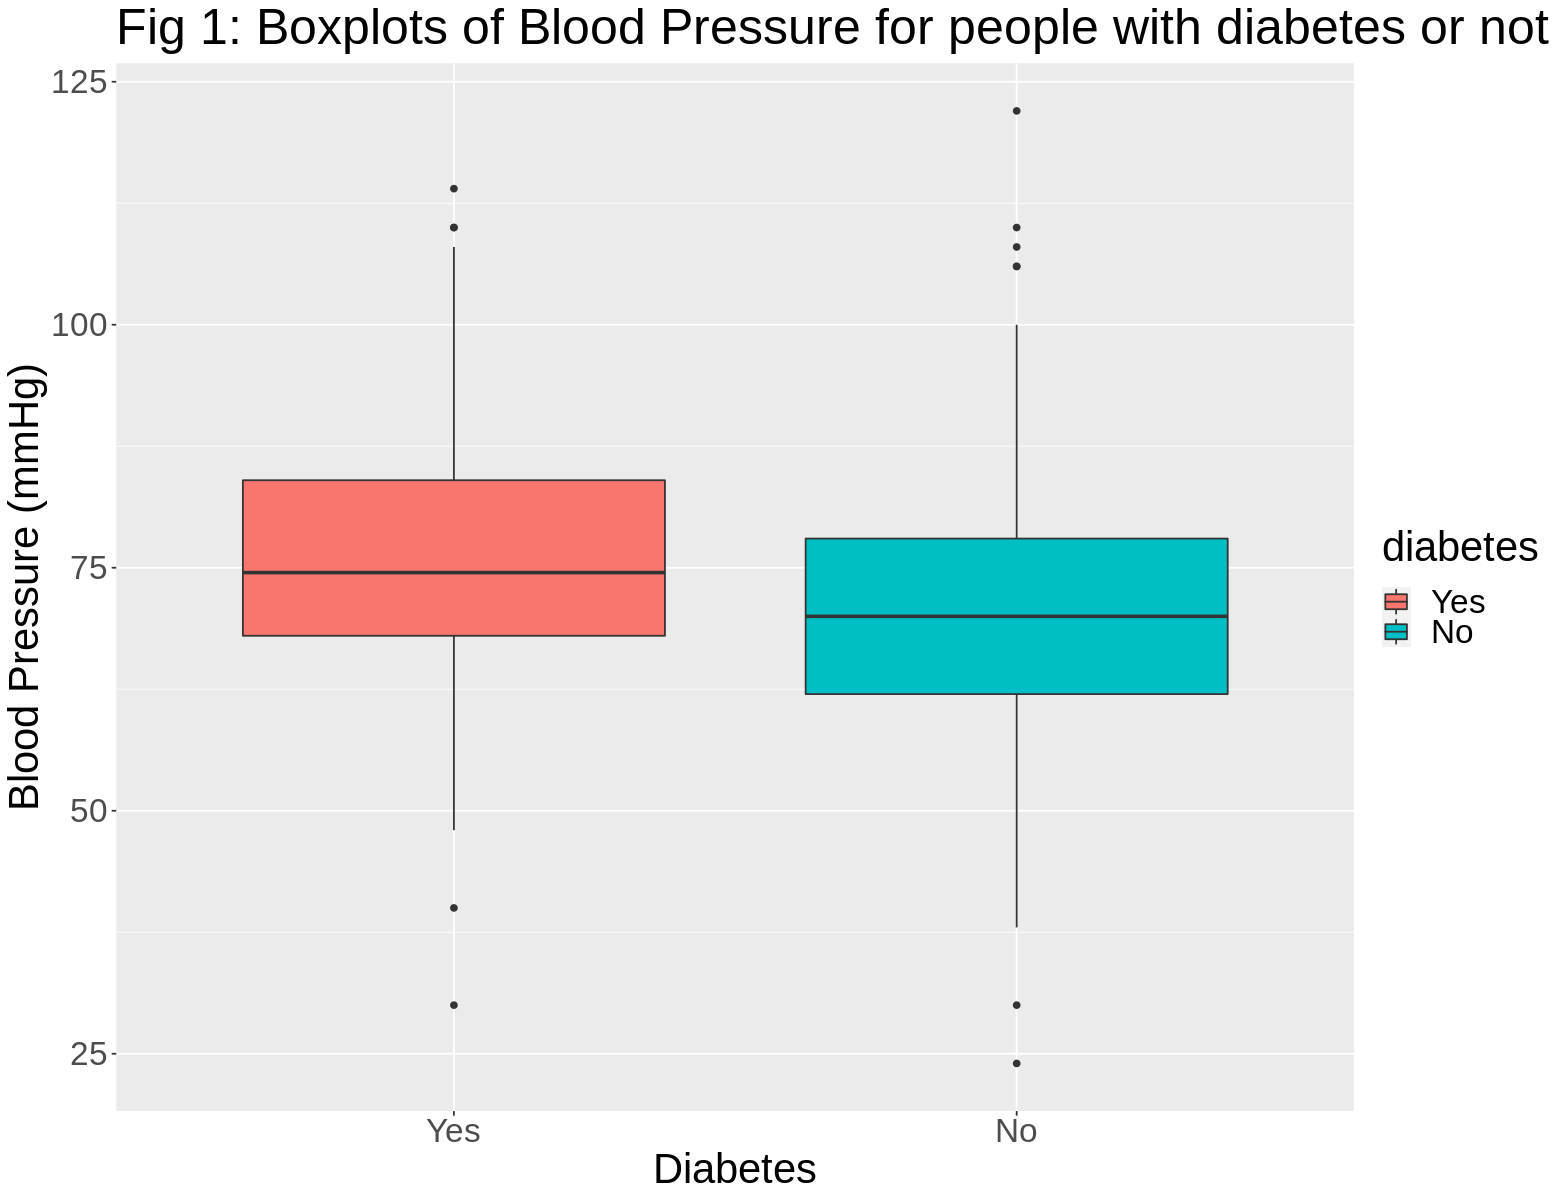

In [123]:
# Goal of the cell: Data visualization - boxplot
options(repr.plot.width= 13, repr.plot.height= 10 ) #set the graph size

boxplots <- diabetes_data_final %>%
    ggplot() +
    geom_boxplot(aes(x = diabetes, BloodPressure, fill = diabetes)) +
    theme(text = element_text(size = 25)) +
    ggtitle("Fig 1: Boxplots of Blood Pressure for people with diabetes or not") +
    xlab("Diabetes") +
    ylab("Blood Pressure (mmHg)") 

boxplots

Using `ggplot()`, we visualise by creating 2 histograms:
1. `histogram_diabetes_yes` to depict the blood pressure of females with diabetes.
2. `histogram_diabetes_no` to depict the blood pressure of females without diabetes.

Warning message:
“Ignoring unknown parameters: linewidth”
Warning message:
“Ignoring unknown parameters: linewidth”


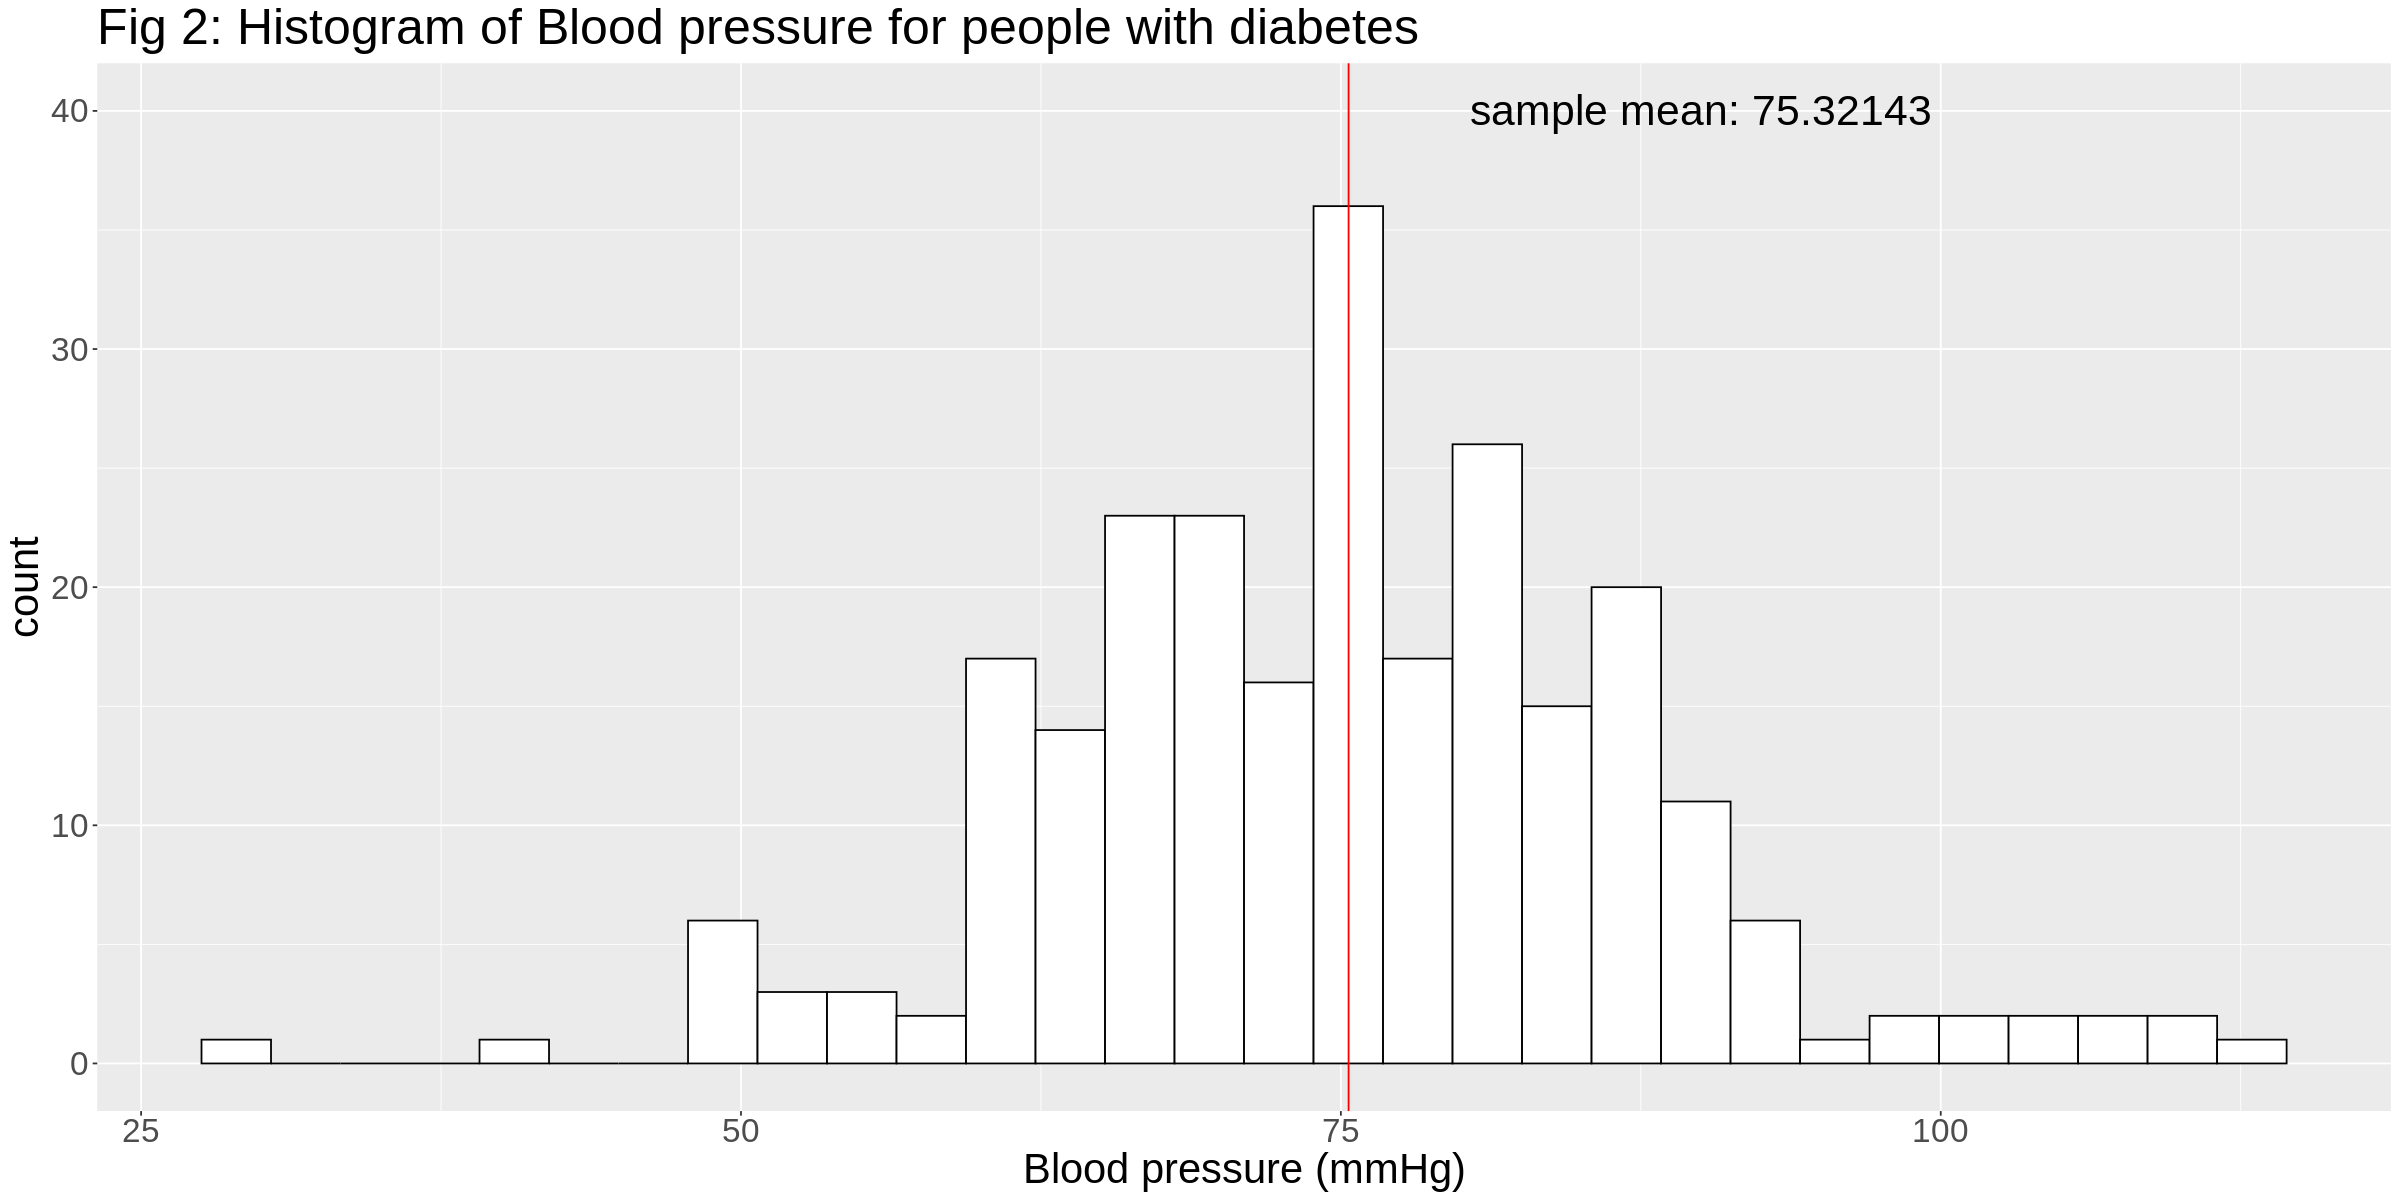

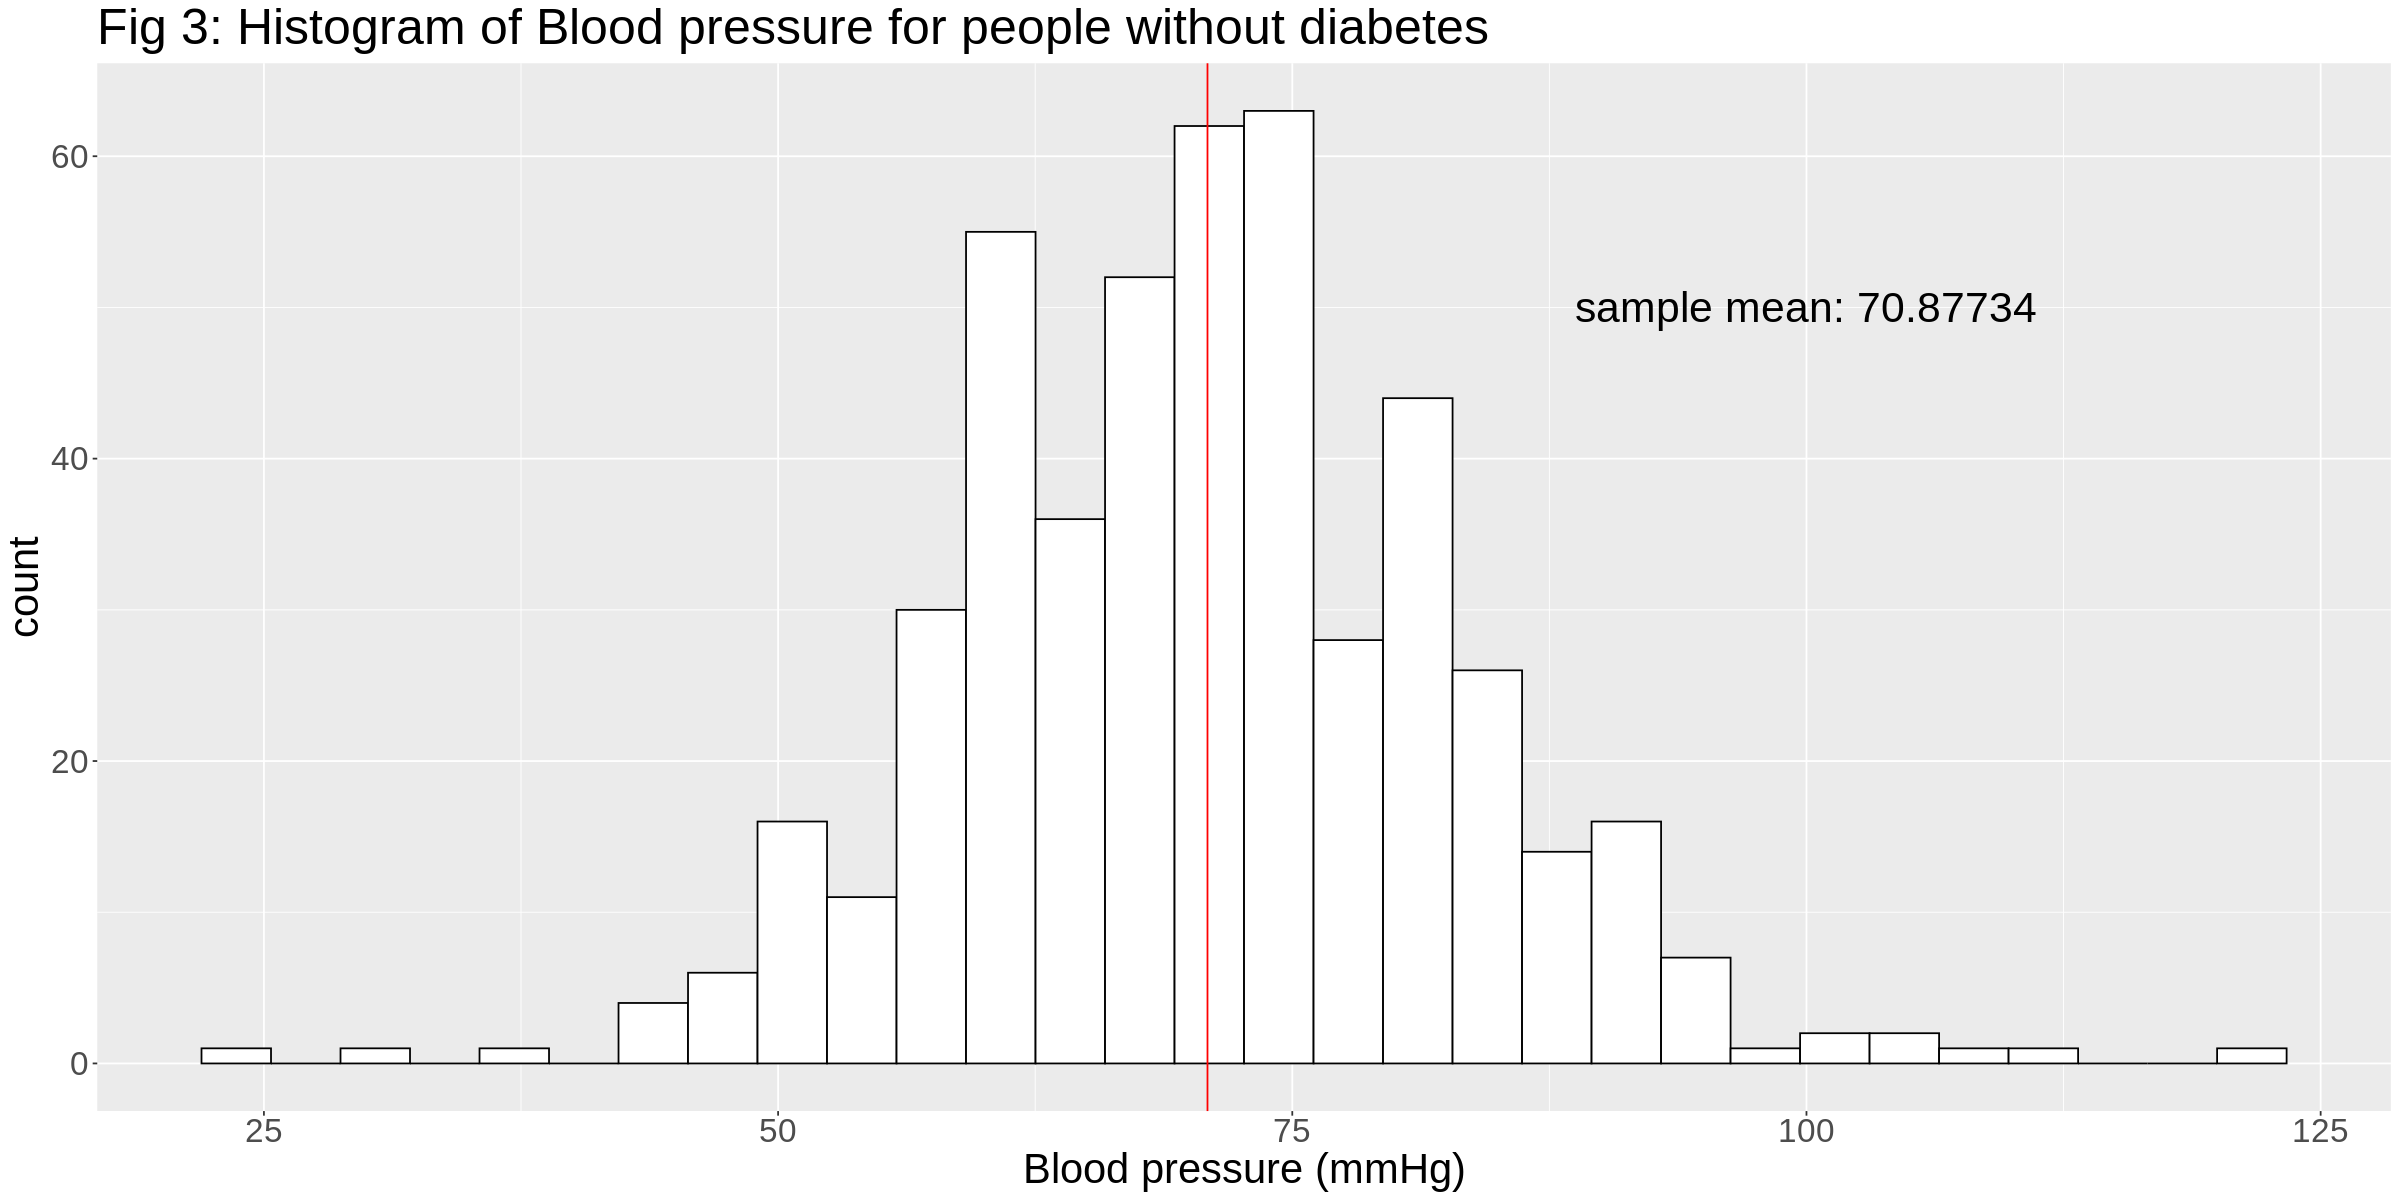

In [126]:
# Goal of the cell: create two distributions

options(repr.plot.width= 20, repr.plot.height=10) #set the graph size

histogram_diabetes_yes <- diabetes_data_final %>% 
    filter(Outcome == "Yes") %>%
    ggplot(aes(x = BloodPressure)) +
    geom_histogram(color="black", fill="white", bins = 30) +
    theme(text = element_text(size = 25)) +
    xlab("Blood pressure (mmHg)") + 
    ylab("count")+
    ggtitle("Fig 2: Histogram of Blood pressure for people with diabetes") + 
    geom_vline(xintercept = estimates$mean[1], color = "red", linewidth = 1.5) + #add a line of sample mean
    annotate("text", x = 90, y = 40, label = "sample mean: 75.32143", size = 9) 

histogram_diabetes_no <- diabetes_data_final %>%
    filter(Outcome == "No") %>%
    ggplot(aes(x = BloodPressure),color = 'white') +
    geom_histogram(color="black", fill="white", bins = 30) +
    theme(text = element_text(size = 25)) + 
    xlab("Blood pressure (mmHg)") +
    ylab("count")+
    ggtitle("Fig 3: Histogram of Blood pressure for people without diabetes") +
    geom_vline(xintercept = estimates$mean[2], color = "red", linewidth = 1.5) + #add a line of sample mean
    annotate("text", x = 100, y = 50, label = "sample mean: 70.87734", size = 9) 

histogram_diabetes_yes 
histogram_diabetes_no

## C. Data Analysis

In this study, we compared the blood pressure of two groups of female participants, those with diabetes and those without diabetes. Descriptive statistics such as mean and standard deviation were used to describe the central tendency and variability of the blood pressure measurements for each group.

To calculate the confidence interval (CI) for the mean difference between the two groups, we will be employing two different methods: the Bootstrap method and the Central Limit Theorem (CLT). We will be using 2500 samples to compute the CI for both methods. Additionally, we will visually represent the CIs using graphs.

We chose to calculate the CI at 95% because it provides a reasonable balance between being too narrow or too wide. A narrower CI, such as 90%, may increase the risk of not containing the true population parameter, whereas a wider CI, such as 99%, may provide less precision in estimating the true population parameter.

### C.1 Bootstrap Method
#### C.1.1 Confidence Interval by Bootstrap

In [87]:
# set seed to ensure reproducibility
set.seed(1)

# get the bootstrap distribution
boot_sample <- diabetes_data_final %>% 
   specify(formula = BloodPressure ~ diabetes) %>% 
   generate(type = "bootstrap", reps = 2500)

# calculate the diff in means from bootstrap resamples
boot_model <- boot_sample %>%
   calculate(stat="diff in means", order = c("Yes", "No"))
# get the 95% confidence interval 
ci_boot <- tibble(lower_ci = quantile(boot_model$stat, 0.025),
                  upper_ci = quantile(boot_model$stat, 0.975))

ci_boot

lower_ci,upper_ci
<dbl>,<dbl>
2.54482,6.288319


**Table 4**
.........

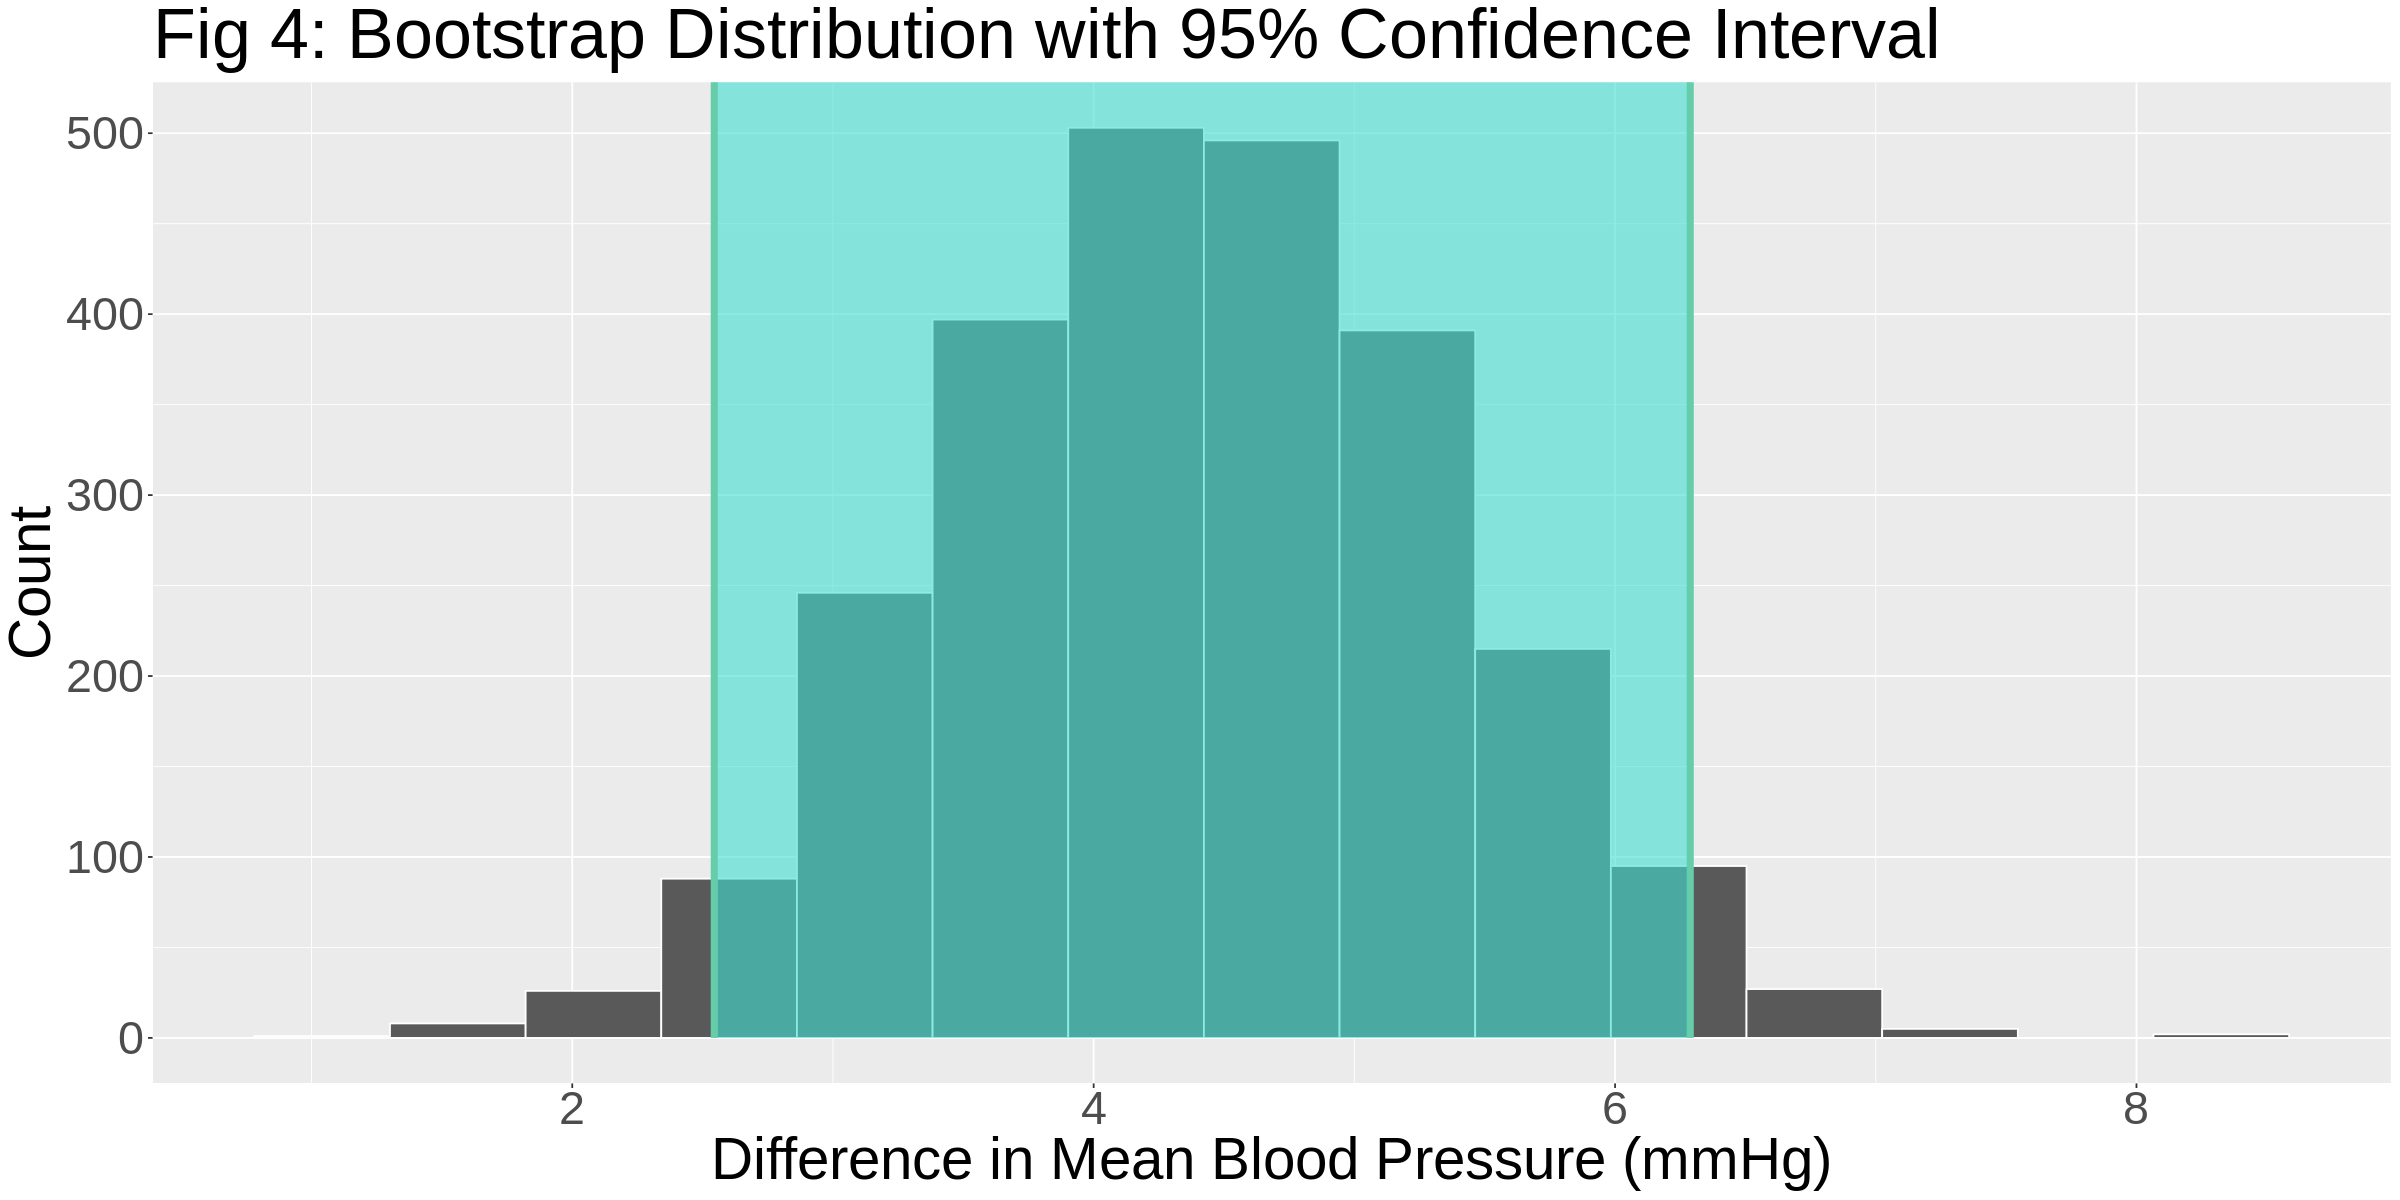

In [89]:
# visualize the confidence interval 
ci_plot <- boot_model %>%
visualize() +
labs(title = "Fig 4: Bootstrap Distribution with 95% Confidence Interval", # label
     x = "Difference in Mean Blood Pressure (mmHg)", y = "Count") +
theme(text = element_text(size = 35)) +
shade_confidence_interval(endpoints = ci_boot) 
ci_plot

**Explaination:**
The x-axis represents the difference in mean blood pressure (in mmHg) between the two groups under investigation, while the y-axis denotes the number of bootstrap samples that fall within each range of the x-axis. The graph indicates that the difference in mean blood pressure between diabetic and non-diabetic females falls within the range of 2.54 mmHg to 6.29 mmHg with 95% confidence, according to the Bootstrap method. Moreover, the distribution of the graph appears to be symmetrical.

#### C.1.2 Hypothesis Testing by Simulation

The goal is to test whether there is a significant difference in the mean blood pressure of diabetic and non-diabetic individuals in the diabetes dataset. First, we compute the test statistic followed by constructing a null model, under the assumption of independence using 2500 replications. We then generate a visualization of the null model and derive the corresponding p-value, which serves as an indicator of the statistical significance of the observed difference in mean blood pressure between the two groups.

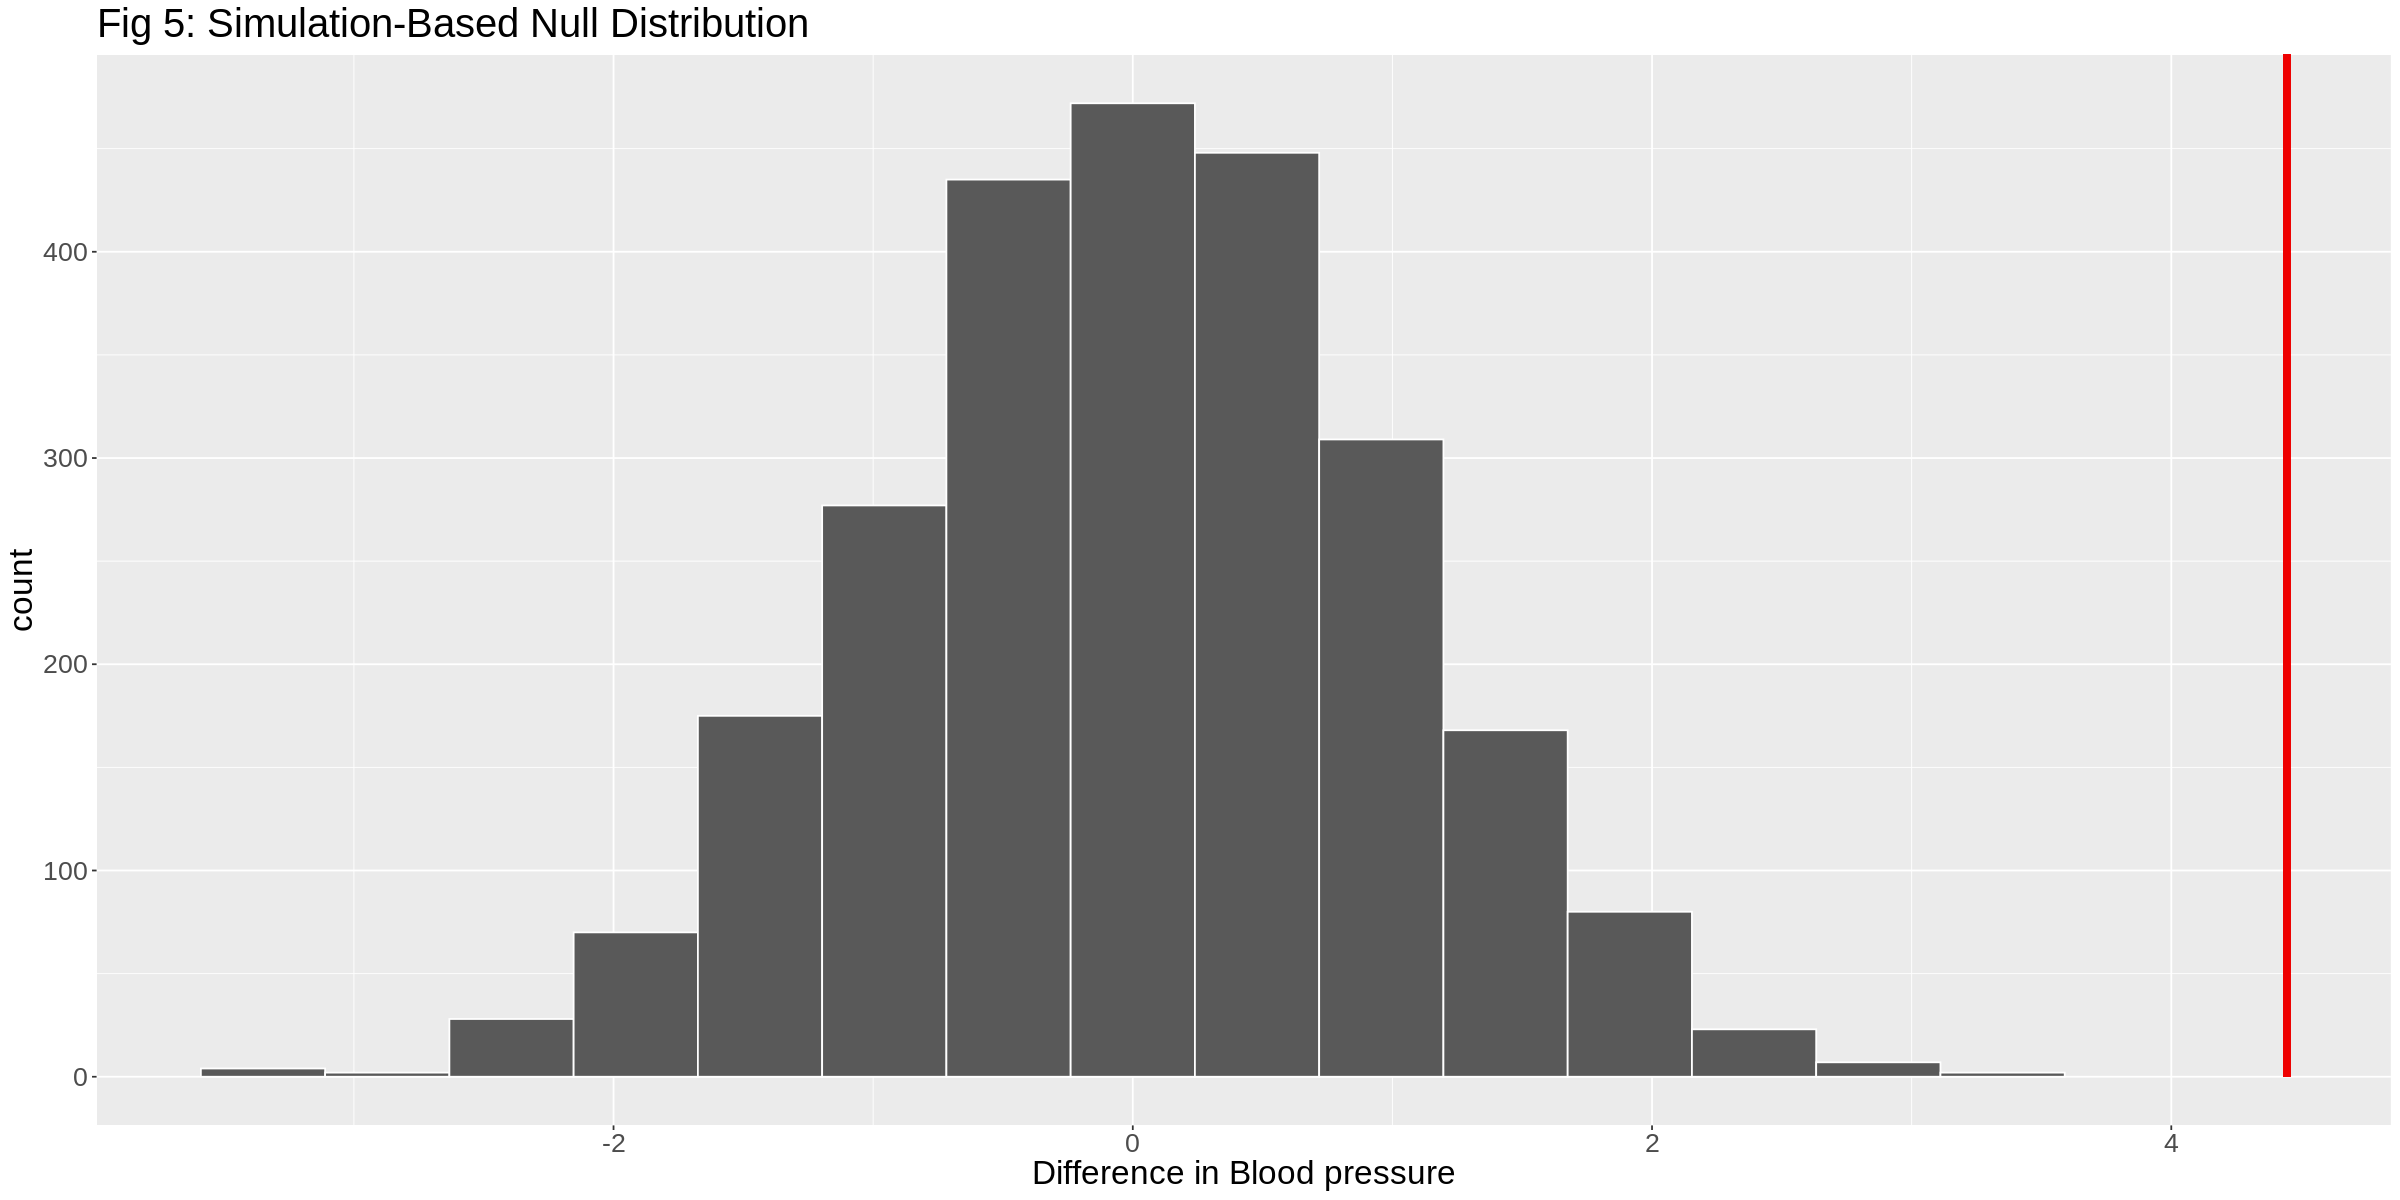

In [99]:
# set seed to ensure reproducibility
set.seed(1)

# calculate test statistic
t <- (estimates$mean[1] - estimates$mean[2])

# get the null model
null_model <- diabetes_data_final %>% 
    specify(formula = BloodPressure ~ diabetes) %>% 
    hypothesize(null = "independence") %>%
    generate(reps = 2500, type = "permute") %>%
    calculate(stat = "diff in means", order = c("Yes", "No"))

# visualize the null model 
null_histogram <- null_model %>% 
    visualize() +
    shade_p_value(obs_stat = t, direction = "right") + 
    theme(text = element_text(size= 20)) +
    ggtitle("Fig 5: Simulation-Based Null Distribution") +
    labs(x= "Difference in Blood pressure") 

null_histogram

In [100]:
# get the p-value                
p_value <- null_model %>%
    get_p_value(obs_stat = t, direction = "right")

p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


Table 5

**Interpretation**: Though a true p-value of 0 is impossible, get_p_value may return 0 in some cases. We can say that none of our replicates capture the observed value of the test statistic. 

### C.2 Asympototic Method
#### C.2.1 Confidence Interval by Asympototic Method


**Rules that satisfy CLT:**

In order to utilise the Asymptotic Method, we must adhere to certain guidelines, which are as follows: 
1. In our experiment, we utilised a sample size of 2500, which satisfies the requirement that a larger sample size leads to a more accurate approximation. 
2. The graphs depicting the bootstrap distribution of confidence intervals and the simulation-based null distribution show that the distribution is approximately normal, satisfying the Central Limit Theorem's requirement that the distribution be normally distributed. 
3. We also computed the sample mean of blood pressure for both the 'yes' and 'no' groups, which were 75.32143 and 70.87734, respectively, and found that the difference in sample means, or test statistic, was 4.44409. 
4. When employing the bootstrap method, we randomly selected samples and ensured their independence from the population by specifying the hypothesis of independence.

We split the dataset into two groups, `ds_yes` and `ds_no` depending on whether the female is suffering from diabetes.  

In [105]:
# first split data to two groups according to whether people have diabetes
ds_yes <- diabetes_data_final %>%
    filter(diabetes == "Yes") %>%
    select(BloodPressure)

ds_no <- diabetes_data_final %>%
    filter(diabetes == "No") %>%
    select(BloodPressure)

We store the output of the `t.test` function used to calculate confidence interval in `t_test`.

In [107]:
# with the use of function t.test, calculate the confidence interval
t_test <- t.test(x = ds_yes$BloodPressure, y = ds_no$BloodPressure)
    output <- tidy(t_test)

# only show the confidence interval
output[c(7,8)]

conf.low,conf.high
<dbl>,<dbl>
2.572156,6.316023


Table 6

**Interpretation:** In this case, the confidence interval calculated by the asymptotic method is (2.572, 6.316) at the 95% confidence level. This means that we can be 95% confident that the true difference in mean blood pressure between people with diabetes and people without diabetes is between 2.572 and 6.316.

#### C.2.2 Hypothesis Testing by Asympototic Method

Now we calculate the p-value directly using the `p.value` function.

In [102]:
# We can directly get the p-value from the output of t-test for Confidence interval
p_value <- output$p.value
p_value

[1] 3.971545e-06

**Interpretation:** From asymptotic method, we can report our p-value to be 3.97154463719127e-06.

### C.3 Comparison and Results

- When using bootstrap samples with 2500 repetitions, we receive a resulting confidence interval of (2.54482, 6.288319).

- When using simulated samples with 2500 repetitions, we receive a resulting confidence interval of (2.572156, 6.316023).

- Upon comparison, the simulation confidence interval is wider than the bootstrap confidence interval. A wider confidence interval translates to higher instability and larger chance of making errors.

- Since we are given the confidence interval, we can find the point estimate from the average of lower and upper values of the confidence interval, as well as the margin of error by dividing the difference in two.

- For bootstrap samples, this point estimate is 4.4165695, with a margin of error of 1.8717495.

- For simulation samples, this point estimate is 4.4440895, with a margin of error of 1.8719335.

- Notice that these point estimates are very similar, each differing by ~0.02 mmHg.
- The margin of errors differ by ~0.0002 mmHg.

- Furthermore, our reported p-value from simulation of **0.00**, as well as our reported p-value from asymptotic method of **3.97154463719127e-06** is less than our alpha level of 0.05. With this, we reject $H_0$ at a 95% confidence level.

## D. Discussion

From our above analysis, we reject $H_0$. We have statistically significant evidence to prove that the true difference in mean blood pressure between those with and without diabetes is not 0. 

From our bootstrap and simulated samples, we have calculated respective confidence intervals for the statistic. However, both intervals do not contain the value 0, further supporting the previous conclusion. 

Our calculated confidence intervals are both centered around 4.4, which is similar to our test statistic of 4.4440896940897. This shows us that our theory-based testing is accurate.

Prior to testing, we expected that the average blood pressure of women with diabetes would be higher than the blood pressure of women without diabetes. Our results support our previous expectations.

Furthermore, all resulting confidence intervals are greater than 0. Thus, we can conclude that the true difference in blood pressure between those with and without diabetes is greater than 0.

#### Future Questions
Some questions that can lead to future research are:
1. Is there an optimal blood pressure a healthy person should have to live a disease-free life?
2. How does the relationship between blood pressure and hypertension vary in people of different age categories and over different populations?
3. Can interventions aimed at preventing the increase of blood pressure also reduce the risk of other health-related problems?

## F. References

1. Chauhan, Aman. “Predict Diabetes.” Www.kaggle.com, 2022, www.kaggle.com/datasets/whenamancodes/predict-diabities?resource=download.
    
2. Barhum, Lana. “Diabetes and Hypertension: What Is the Relationship?” Www.medicalnewstoday.com, 28 May 2019, www.medicalnewstoday.com/articles/317220.
    
3. “Diabetes and High Blood Pressure.” Johns Hopkins Medicine, 2020, www.hopkinsmedicine.org/health/conditions-and-diseases/diabetes/diabetes-and-high-blood-pressure.
    
4. Petrie, John R., et al. “Diabetes, Hypertension, and Cardiovascular Disease: Clinical Insights and Vascular Mechanisms.” The Canadian Journal of Cardiology, vol. 34, no. 5, 2018, pp. 575–84, doi:https://doi.org/10.1016/j.cjca.2017.12.005.
    
5. Roumie, Christianne L., et al. “Blood Pressure Control and the Association with Diabetes Mellitus Incidence.” Hypertension, vol. 75, no. 2, Feb. 2020, pp. 331–38, doi:https://doi.org/10.1161/hypertensionaha.118.12572.
    
6. WebMD. “Diabetes and High Blood Pressure.” WebMD, WebMD, 25 Oct. 2001, www.webmd.com/diabetes/high-blood-pressure.
    
7. Kazeminia, M., Salari, N., & Mohammadi, M. (2020). Prevalence of cardiovascular disease in patients with type 2 diabetes mellitus in iran: A systematic review and meta-analysis. Journal of Diabetes Research, 2020, 3069867-9. https://doi.org/10.1155/2020/3069867

8. Savoia, C., & Touyz, R. M. (2017). Hypertension, diabetes mellitus, and excess cardiovascular risk: Importance of baseline systolic blood pressure American Heart Association. doi:10.1161/HYPERTENSIONAHA.117.09764
